# Exploring and Pre-processing Data

## Các thư viện cần thiết

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

---

## **_01. Exploring Data:_**

In [2]:
pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('./Data/manga.csv')
manga_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaN,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaN,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"['Action', 'Adventure', 'Horror', 'Mystery', '...",['Historical'],"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"['Drama', 'Slice of Life']",['Psychological'],['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,NaN,0,currently_publishing,NaN,NaN,2022-07-25,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2022-07-25,NaN,"['Horror', 'Supernatural', 'Suspense']",[],['Seinen'],[],[],NaN,NaN,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,NaN,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,NaN,0,currently_publishing,NaN,NaN,2020-09-30,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2020-09-30,NaN,"['Action', 'Adventure', 'Fantasy']",[],[],[],[],"Ars, the prince of the Kingdom of Karit

#### Dữ liệu có bao nhiêu dòng và cột ?

In [3]:
manga_df.shape

(67273, 31)

Dữ liệu có 67273 dòng và 31 cột

#### Ý nghĩa của từng dòng là gì ?

Mỗi dòng là thông tin của một manga

#### Có tồn tại dòng nào bị trùng lắp không ?

In [4]:
np.sum(manga_df.duplicated())

0

Dữ liệu không có dòng nào trùng lắp

#### Ý nghĩa của từng cột là gì ?

  | Cột               | Ý nghĩa                                                                       |
  |-------------------|-------------------------------------------------------------------------------|
  |`manga_id`         | ID của manga (mỗi manga có một ID riêng biệt)                                 |
  |`title`            | Tựa đề của manga (viết theo phiên âm tiếng Nhật hoặc tiếng Anh)               |
  |`type`             | Được phát hành theo dạng nào (truyện tranh, tiểu thuyết,...)                  |
  |`score`            | Điểm số trên trang MyAnimeList (MAL)                                          |
  |`scored_by`        | Số lượng người dùng đã đánh giá manga                                         |
  |`status`           | Tình trạng (đang phát hành, đã hoàn thành, tạm dừng,...)                      |
  |`volumes`          | Số tập                                                                        |
  |`chapters`         | Số chương                                                                     |
  |`start_date`       | Ngày bắt đầu phát hành                                                        |
  |`end_date`         | Ngày kết thúc phát hành                                                       |
  |`members`          | Số lượng người dùng có manga này trong list của họ                            |
  |`favorites`        | Số lượng người dùng yêu thích manga này                                       |
  |`sfw`              | Manga có nhãn 18+ hay không                                                   |
  |`approved`         | Manga có được phê duyệt hay chưa                                              |
  |`created_at_before`| Ngày trước khi mục của manga này được tạo                                     |
  |`updated_at`       | Ngày cập nhật gần đây nhất của manga này                                      |
  |`real_start_date`  | Ngày bắt đầu phát hành thật sự                                                |
  |`real_end_date`    | Ngày kết thúc phát hành thật sự                                               |
  |`genres`           | Thể loại                                                                      |
  |`themes`           | Chủ đề                                                                        |
  |`demographics`     | Nhân khẩu học                                                                 |
  |`authors`          | Thông tin tác giả                                                             |
  |`serializations`   | Danh sách các tạp chí nơi manga này được đăng lên                             |
  |`sypnosis`         | Mô tả                                                                         |
  |`background`       | Thông tin thêm                                                                |
  |`main_picture`     | URL hình ảnh chính của manga trên MAL                                         |
  |`url`              | URL của manga trên MAL                                                        |
  |`title_english`    | Tựa đề tiếng Anh của manga                                                    |
  |`title_japanese`   | Tựa đề tiếng Nhật của manga                                                   |
  |`title_synonyms`   | Danh sách các tựa đề đồng nghĩa                                               |
  |`jikan`            | Manga này được scrape từ Jikan API hay API chính thức của MAL                 |

#### Kiểu dữ liệu hiện tại của từng cột là gì ? Có tồn tại những cột nào có kiểu dữ liệu không phù hợp hay không ?

In [5]:
manga_df.dtypes

manga_id               int64
title                 object
type                  object
score                float64
scored_by              int64
status                object
volumes              float64
chapters             float64
start_date            object
end_date              object
members                int64
favorites              int64
sfw                     bool
approved                bool
created_at_before     object
updated_at            object
real_start_date       object
real_end_date         object
genres                object
themes                object
demographics          object
authors               object
serializations        object
synopsis              object
background            object
main_picture          object
url                   object
title_english         object
title_japanese        object
title_synonyms        object
jikan                   bool
dtype: object

#### Để hiểu rõ hơn về các cột có kiểu là object, ta sẽ phân tích ra thành từng kiểu con

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

manga_df[manga_df.dtypes.index[manga_df.dtypes == object]].apply(open_object_dtype)

title                                 {<class 'str'>}
type                                  {<class 'str'>}
status                                {<class 'str'>}
start_date           {<class 'str'>, <class 'float'>}
end_date             {<class 'str'>, <class 'float'>}
created_at_before                     {<class 'str'>}
updated_at           {<class 'str'>, <class 'float'>}
real_start_date      {<class 'str'>, <class 'float'>}
real_end_date        {<class 'str'>, <class 'float'>}
genres                                {<class 'str'>}
themes                                {<class 'str'>}
demographics                          {<class 'str'>}
authors                               {<class 'str'>}
serializations                        {<class 'str'>}
synopsis             {<class 'str'>, <class 'float'>}
background           {<class 'str'>, <class 'float'>}
main_picture         {<class 'str'>, <class 'float'>}
url                                   {<class 'str'>}
title_english        {<class

#### Các cột phù hợp và không phù hợp về kiểu dữ liệu
- `manga_id`, `title`, `type`, `score`, `scored_by`, `status`, `volumes`, `chapters`, `members`, `favorites`, `sfw`, `appoved`, `url`, `jikan`: phù hợp
- `start_date`, `end_date`, `created_at_before`, `updated_at`, `real_start_date`, `real_end_date`: chuyển về date
- `genres`, `themes`, `demographics`, `authors`, `serializations`, `title_synonyms`: chuyển về str array
- `synopsis`, `background`, `main_picture`, `title_english`, `title_japanese`: chuyển về str

  | Cột               | Kiểu dữ liệu có phù hợp |
  |-------------------|-------------------------|
  |`manga_id`         | True                    |
  |`title`            | True                    |
  |`type`             | True                    |
  |`score`            | True                    |
  |`scored_by`        | True                    |
  |`status`           | True                    |
  |`volumes`          | True                    |
  |`chapters`         | True                    |
  |`start_date`       | False (to datetime)     |
  |`end_date`         | False (to datetime)     |
  |`members`          | True                    |
  |`favorites`        | True                    |
  |`sfw`              | True                    |
  |`approved`         | True                    |
  |`created_at_before`| False (to datetime)     |
  |`updated_at`       | False (to datetime)     |
  |`real_start_date`  | False (to datetime)     |
  |`real_end_date`    | False (to datetime)     |
  |`genres`           | False (to str arr)      |
  |`themes`           | False (to str arr)      |
  |`demographics`     | False (to str arr)      |
  |`authors`          | False (to str arr)      |
  |`serializations`   | False (to str arr)      |
  |`sypnosis`         | False (to str)          |
  |`background`       | False (to str)          |
  |`main_picture`     | False (to str)          |
  |`url`              | True                    |
  |`title_english`    | False (to str)          |
  |`title_japanese`   | False (to str)          |
  |`title_synonyms`   | False (to str arr)      |
  |`jikan`            | True                    |

## **_02. Pre-processing Data:_**

**Ta sẽ chuyển những cột có kiểu không phù hợp về dạng thích hợp như đã đề cập ở phần 1**

In [7]:
# Chuyen ve kieu datetime bang pd.to_datetime
manga_df['start_date'] = pd.to_datetime(manga_df['start_date'], format='%Y-%m-%d')
manga_df['end_date'] = pd.to_datetime(manga_df['end_date'], format='%Y-%m-%d')
manga_df['created_at_before'] = pd.to_datetime(manga_df['created_at_before'])
manga_df['updated_at'] = pd.to_datetime(manga_df['updated_at'], format='%Y-%m-%d %H:%M:%S')
manga_df['real_start_date'] = pd.to_datetime(manga_df['real_start_date'])
manga_df['real_end_date'] = pd.to_datetime(manga_df['real_end_date'])

# Chuyen ve str array bang ast.literal_eval
manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']] = \
    manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']] = \
    manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']].replace(to_replace=np.nan, value='')

#### Bây giờ ta có thể thấy, tất cả dữ liệu đều hợp lệ

In [8]:
manga_df.apply(open_object_dtype)

manga_id                                               {<class 'int'>}
title                                                  {<class 'str'>}
type                                                   {<class 'str'>}
score                                                {<class 'float'>}
scored_by                                              {<class 'int'>}
status                                                 {<class 'str'>}
volumes                                              {<class 'float'>}
chapters                                             {<class 'float'>}
start_date           {<class 'pandas._libs.tslibs.nattype.NaTType'>...
end_date             {<class 'pandas._libs.tslibs.nattype.NaTType'>...
members                                                {<class 'int'>}
favorites                                              {<class 'int'>}
sfw                                                   {<class 'bool'>}
approved                                              {<class 'bool'>}
create

## **_03. Exploring Data (cont):_**

### **_03.1. Phân bổ các cột kiểu số:_**

Với các cột này ta tính tỉ lệ miss (tỉ lệ giá trị nan, nat), giá trị nhỏ nhất (min), trung vị (median) và giá trị lớn nhất (max).

In [9]:
# List cac cot kieu so (numerical)
nume_cols = ['score', 'scored_by', 'volumes', 'chapters', 'start_date', 'end_date', 'members', 'favorites', 'created_at_before', 'updated_at', 'real_start_date', 'real_end_date']

# Phan tram gia tri thieu, min, median, max
missing_percentages = np.sum(manga_df[nume_cols].isna(), axis=0) / manga_df.shape[0] * 100
mins = manga_df[nume_cols].quantile(0, numeric_only=False)
medians = manga_df[nume_cols].quantile(0.5, numeric_only=False)
maxs = manga_df[nume_cols].quantile(1, numeric_only=False)

# Dataframe minh hoa
nume_cols_dist_df = pd.DataFrame(data=[missing_percentages, mins, medians, maxs],
                                       index=['Missing percentage', 'Min', 'Median', 'Max'],
                                       columns=nume_cols)
nume_cols_dist_df

,score,scored_by,volumes,chapters,start_date,end_date,members,favorites,created_at_before,updated_at,real_start_date,real_end_date
Missing percentage,67.431213,0.0,24.941656,29.994203,6.427542,23.117744,0.0,0.0,0.0,12.311031,6.427542,23.117744
Min,2.450000,0.0,1.000000,1.000000,1922-01-01 00:00:00,1924-10-31 00:00:00,0.0,0.0,2007-07-17 20:14:45+00:00,2007-07-17 20:14:45+00:00,1922-01-01 00:00:00,1924-10-31 00:00:00
Median,6.940000,25.0,1.000000,9.000000,2012-06-12 00:00:00,2012-12-13 00:00:00,125.0,0.0,2015-03-26 12:32:05+00:00,2020-11-19 21:09:29+00:00,2012-06-12 00:00:00,2012-12-13 00:00:00
Max,9.450000,363368.0,200.000000,6477.000000,2022-10-14 00:00:00,2022-08-09 00:00:00,590241.0,103820.0,2022-07-25 17:32:10.227760896+00:00,2022-07-25 04:59:06+00:00,2022-10-14 00:00:00,2022-08-09 00:00:00


Ta có thể thấy:
- Về missing percentage:
    - `scored_by`, `members`, `favorites`, `created_at_before` có đầy đủ dữ liệu.
    - `score` bị thiếu rất nhiều nhưng `scored_by` thì lại đầy đủ bởi vì hệ thống của MAL chỉ tính điểm khi đáp ứng được một số yêu cầu (có thể là phải đủ số lượt đánh giá, những người đánh giá phải thỏa mãn một số điều kiện như là phải đọc hết hoặc đọc được một mức nào đó,..), cộng thêm một số bộ mà `status` của nó là not_yet_published (chưa được phát hành) nên chưa được chấm điểm.
    - `volumes` và `chapters` bị thiếu chủ yếu là do `status` của nó (chưa hoàn thành, đang tạm dừng, chưa phát hành,...), vì 2 cột này chỉ hiển thị số tập và số chương khi bộ đó đã kết thúc (hoàn thành hoặc bị dừng vô thời hạn).
    - `start_date` và `real_start_date` bị thiếu một vài có lẽ là do không có thông tin hoặc bộ đó chưa được phát hành.
    - `end_date` và `real_end_date` bị thiếu kha khá, lý do có thể giống như trên cộng thêm việc bộ đó chưa kết thúc.
    - `updated_at` bị thiếu là do entry của bộ đó được tạo nhưng chưa được update lần nào sau đó.
- Về min, median và max:
    - Tất cả các cột ngoại trừ `score` đều có range rất rộng.
    - Đối với các cột kiểu số thì giá trị chủ yếu nằm trong khoảng từ min tới median.
    - Đối với các cột kiểu thời gian thì giá trị chủ yếu nằm trong khoảng từ median tới max.

Xét cột `score`, `scored_by`, `volumes`, `chapters`, `members`, `favorites`

<AxesSubplot:xlabel='score'>

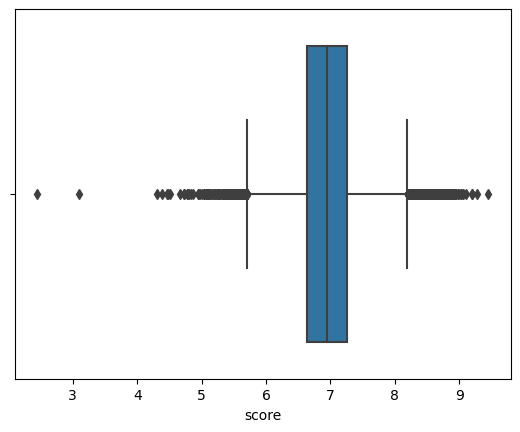

In [10]:
sns.boxplot(x=manga_df['score'])

Dựa trên biểu đồ có thể thấy là 50% tất cả số điểm nằm trong khoảng xấp xỉ 7 điểm, min và max (không tính outliers) lần lượt là khoảng 6.75 và 8.25.

In [11]:
Q1 = manga_df['score'].quantile(0.25)
Q3 = manga_df['score'].quantile(0.75)
IQR = manga_df['score'].quantile(0.75) - manga_df['score'].quantile(0.25)
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

len(manga_df[(manga_df['score'] < minimum) | (manga_df['score'] > maximum)])

611

Có 611 outliers xét trong cột __**`score`**__

In [12]:
# Trong những bộ bị thiếu score, bộ có nhiều người đánh giá nhất là bao nhiêu người ?
manga_df['scored_by'][np.isnan(manga_df['score'])].max()

282

In [13]:
# Trong những bộ có score, bộ có ít người đánh giá nhất là bao nhiêu người ?
manga_df['scored_by'][~np.isnan(manga_df['score'])].min()

25

Như vậy có thể 25 là số lượt đánh giá tối thiểu mà một bộ manga cần để được tính điểm, nhưng nếu có nhiều hơn con số này thì cũng chưa chắc được tính điểm vì những lý do đã nói bên trên.

In [14]:
# Số bộ manga bị thiếu cột volumes gom nhóm theo status
np.unique(manga_df['status'][manga_df['volumes'].isna()], return_counts=True)

(array(['currently_publishing', 'discontinued', 'finished',
        'not_yet_published', 'on_hiatus'], dtype=object),
 array([9512,   28, 7155,   47,   37]))

In [15]:
# Số bộ manga bị thiếu cột chapters gom nhóm theo status
np.unique(manga_df['status'][manga_df['chapters'].isna()], return_counts=True)

(array(['currently_publishing', 'discontinued', 'finished',
        'not_yet_published', 'on_hiatus'], dtype=object),
 array([ 9510,    12, 10551,    56,    49]))

Như đã giải thích ở trên, vì __**`volumes`**__ và __**`chapters`**__ chỉ xuất hiện khi bộ manga đã kết thúc, vậy nên những manga đang phát hành (currently_publishing) bị thiếu nhiều.
Nhưng tại sao những manga đã hoàn thành (finished) lại bị thiếu cũng rất nhiều ? Lý do có thể là:

   - Vì số lượng manga có __**`status`**__ là finished chiếm phần lớn trong bộ dữ liệu.
    
   - Đối với những bộ chỉ có __**`chapters`**__ nhưng không có __**`volumes`**__ thì lý do lớn nhất là những bộ manga one-shot (những bộ chỉ có 1 chapter) nên sẽ không có tập (__**`volumes`**__) nào hết. Những bộ one-shot như vậy chiếm tỉ lệ rất nhiều trên MAL.
    
   - Đối với những bộ chỉ có __**`volumes`**__ nhưng không có __**`chapters`**__ thì lý do lớn nhất là những bộ tiểu thuyết (light_novel hoặc novel) thường được xuất bản theo tập và tác giả lại không chia chapters khi viết. Những bộ tiểu thuyết chiếm tỉ lệ cũng rất nhiều trên MAL.
    
   - Lý do cuối cùng và đơn giản nhất đó là chính MAL cũng không thể tìm được thông tin (tác phẩm quá ít người biết đến, tác giả không cung cấp thông tin,...).

Xét cột `start_date`, `real_start_date`, `end_date`, `real_end_date`, `created_at_before`, `updated_at`

Dựa vào dataframe thì ta có thể thấy những cột trên có range khá rộng, riêng những cột '_date' có giá trị nhỏ nhất là thời điểm những năm 1920s. Nhưng giá trị chủ yếu tập trung ở khoảng 15 năm trở lại đây.

In [28]:
# Tỉ lệ những dòng có start_date == real_start_date
(np.sum(manga_df['start_date'] == manga_df['real_start_date']) / manga_df.shape[0]) * 100

93.57245849003316

In [29]:
# Tỉ lệ những dòng có end_date == real_end_date
(np.sum(manga_df['end_date'] == manga_df['real_end_date']) / manga_df.shape[0]) * 100

76.88225588274642

Mỗi dòng đa phần có `start_date` và `real_start_date` là như nhau, với `end_date` và `real_end_date` thì có khoảng 3/4 số dòng là như nhau.

### **_03.2. Phân bổ các cột kiểu phân loại:_**

#### Các cột kiểu str

Với các cột này ta tính tỉ lệ miss (tỉ lệ chuỗi rỗng), số giá trị khác nhau (không tính miss) và list những giá trị đó (không tính miss).

In [17]:
str_col_profiles_df = pd.DataFrame({'title': [.0] * 3,
                                     'type': [.0] * 3,
                                     'status': [.0] * 3,
                                     'synopsis': [.0] * 3,
                                     'background': [.0] * 3,
                                     'main_picture': [.0] * 3,
                                     'url': [.0] * 3,
                                     'title_english': [.0] * 3,
                                     'title_japanese': [.0] * 3},
                                    index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

str_col_profiles_df.loc['Missing_ratio'] = np.sum(manga_df[str_col_profiles_df.columns] == '', axis=0) / manga_df.shape[0]
str_col_profiles_df.loc['Num_diff_vals'] = manga_df[str_col_profiles_df.columns][manga_df[str_col_profiles_df.columns] != ''].nunique()
str_col_profiles_df.loc['Diff_vals'] = manga_df[str_col_profiles_df.columns].apply(lambda col: col[col != ''].unique())
str_col_profiles_df

,title,type,status,synopsis,background,main_picture,url,title_english,title_japanese
Missing_ratio,0.0,0.0,0.0,0.321868,0.861178,0.036285,0.0,0.726086,0.039838
Num_diff_vals,63987,7,5,44495,9294,64832,67273,17542,62172
Diff_vals,"[Berserk, One Piece, Fullmetal Alchemist, JoJo...","[manga, manhwa, light_novel, one_shot, manhua,...","[currently_publishing, finished, on_hiatus, di...","[Guts, a former mercenary now known as the ""Bl...",[Berserk won the Award for Excellence at the s...,[https://cdn.myanimelist.net/images/manga/1/15...,"[https://myanimelist.net/manga/2/Berserk, http...","[Berserk, One Piece, Fullmetal Alchemist, Good...","[ベルセルク, ONE PIECE, 鋼の錬金術師, ジョジョの奇妙な冒険 Part7 ST..."


Ta có thể thấy:
- Về missing_ratio:
    - `title`, `type`, `status`, `url` có đầy đủ dữ liệu
    - `synopsis` bị thiếu nhưng vẫn nhiều dữ liệu hơn `background` vì người ta thường quan tâm đến mô tả hơn phần thông tin thêm
    - `title_japanese` bị thiếu nhưng vẫn nhiều dữ liệu hơn `title_english` vì đây là manga của Nhật Bản nên dữ liệu bị thiếu nhiều sẽ là tiếng Anh
    - Một số bộ manga thì không có `main_picture`
- Về num_diff_vals và diff_vals:
    - Các cột: `title`, `synopsis`, `background`, `title_english`, `title_japanese` vẫn có trùng lắp
    - Cột `main_picture` (ngoại trừ những bộ manga không có hình ảnh đại diện) và `url` là không có trùng lắp, mỗi bộ manga sẽ có một hình ảnh và url riêng
    - Cột `type` gồm: manga, manhwa, light_novel, one_shot, manhua, novel, doujinshi
    - Cột `status` gồm: curently_publishing, finished, on_hiatus, discontinued, not_yet_published

Xét các cột `title`, `type`, `status`

**_`title`_** có 4 bộ xuất hiện nhiều nhất

In [18]:
manga_df['title'].mode()

0    40 x 40 Chikuwa Kaigi
1             Fate/Requiem
2                 Hatsukoi
3            Solo Leveling
dtype: object

**_`type`_** dạng manga là phổ biến nhất

0    manga
dtype: object

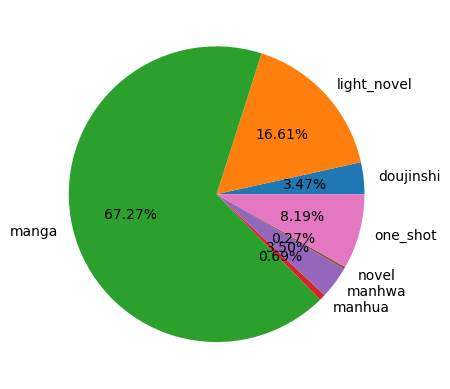

In [19]:
plt.pie(manga_df.groupby('type')['type'].count().values, labels=manga_df.groupby('type')['type'].count().index, autopct = '%1.2f%%');
manga_df['type'].mode()

**_`status`_** finished là trạng thái phổ biến nhất

0    finished
dtype: object

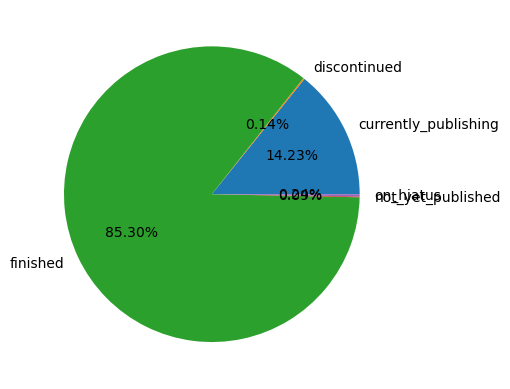

In [20]:
plt.pie(manga_df.groupby('status')['status'].count().values, labels=manga_df.groupby('status')['status'].count().index, autopct = '%1.2f%%');
manga_df['status'].mode()

_Nhìn chung không có gì bất thường với kiểu str_

---

#### Các cột kiểu str array

Với các cột kiểu list này ta sẽ concate các list (trong từng cột) với nhau và dùng unique để tính ra các diff_vals cho từng cột, num_diff_vals sẽ là độ dài của diff_vals vừa tính và missing_ratio sẽ là tỉ lệ những dòng có list rỗng cho từng cột

In [21]:
str_arr_col_profiles_df = pd.DataFrame({'genres': [.0] * 3,
                                        'themes': [.0] * 3,
                                        'demographics': [.0] * 3,
                                        'authors': [.0] * 3,
                                        'serializations': [.0] * 3,
                                        'title_synonyms': [.0] * 3},
                                       index=['missing_ratio', 'num_diff_vals', 'diff_vals'], dtype=object)

str_arr_col_profiles_df.loc['missing_ratio'] = np.sum(manga_df[str_arr_col_profiles_df.columns].apply(lambda col: col.apply(len)) == 0) / manga_df.shape[0]
str_arr_col_profiles_df.loc['diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    manga_df[str_arr_col_profiles_df.columns].apply(np.concatenate)[['genres', 'themes', 'demographics', 'serializations']].apply(np.unique)
str_arr_col_profiles_df.loc['num_diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    str_arr_col_profiles_df.loc['diff_vals'][['genres', 'themes', 'demographics', 'serializations']].apply(len)

str_arr_col_profiles_df

,genres,themes,demographics,authors,serializations,title_synonyms
missing_ratio,0.047017,0.648462,0.598933,0.111828,0.389413,0.513356
num_diff_vals,21,52,5,0.0,1162,0.0
diff_vals,"[Action, Adventure, Avant Garde, Award Winning...","[Adult Cast, Anthropomorphic, CGDCT, Childcare...","[Josei, Kids, Seinen, Shoujo, Shounen]",0.0,"[&.Emo, &Flower, .Bloom, .hack//G.U. The World...",0.0


Ta có thể thấy:
- Về missing_ratio:
    - `themes`, `demographics`, `serializations`, `title_synonyms` bị miss khá nhiều
    - `genres`, `authors` là hai cột quan trọng hơn nên ít miss
- Về num_diff_vals và diff_vals:
    - `genres`, `themes` lần lượt có 21 và 52 loại
    - Có 1162 nhà xuất bản (`serializations`)
    - Có 5 đối tượng (`demographics`) chính: Josei, Kids, Seisen, Shoujo, Shounen

Xét các cột `genres`, `themes`, `demographics`, `serializations`

**_`genres`_** Romance là thể loại phổ biến nhất ~13.83% (tính theo số lần xuất hiện trong tất cả các list của cột)

In [22]:
genres, counts_genres = np.unique(pd.Series(np.concatenate(manga_df['genres'])), return_counts=True)
genres[counts_genres.argmax()], counts_genres[counts_genres.argmax()] / np.sum(counts_genres) * 100

('Romance', 13.829311359623308)

**_`themes`_** School là chủ đề phổ biến nhất ~35.78% (tính theo số lần xuất hiện trong tất cả các list của cột)

In [23]:
themes, counts_themes = np.unique(pd.Series(np.concatenate(manga_df['themes'])), return_counts=True)
themes[counts_themes.argmax()], counts_themes[counts_themes.argmax()] / np.sum(counts_themes) * 100

('School', 35.77756896436002)

**_`demographics`_** Shoujo là đối tượng phổ biến nhất ~30.61% (tính theo số lần xuất hiện trong tất cả các list của cột)

('Shoujo', 30.609756097560975)

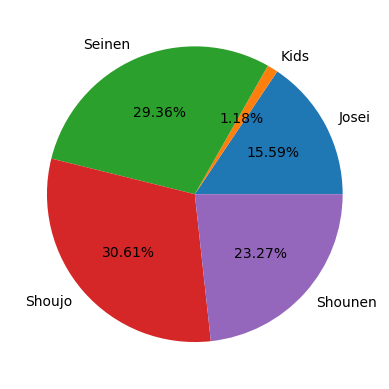

In [24]:
demographics, counts_demographics = np.unique(pd.Series(np.concatenate(manga_df['demographics'])), return_counts=True)

plt.pie(counts_demographics, labels=demographics, autopct = '%1.2f%%');

demographics[counts_demographics.argmax()], counts_demographics[counts_demographics.argmax()] / np.sum(counts_demographics) * 100

_Nhìn chung cũng không có gì bất thường với kiểu str array_